##  Bayesian Linear Regression
## Ibrahim Mohamed Shedoh
## 20/10/2024

In [14]:
#importing neccassary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# Set the random seed for reproducibility
np.random.seed(200)

# Number of samples
num_samples = 1000

# Generate synthetic features
age = np.random.randint(18, 90, num_samples)                   # Age of the patient
bmi = np.random.uniform(18.5, 40.0, num_samples)               # Body Mass Index (BMI)
blood_pressure = np.random.randint(80, 180, num_samples)       # Blood pressure level
cholesterol = np.random.randint(150, 300, num_samples)          # Cholesterol level
heart_rate = np.random.randint(60, 100, num_samples)           # Heart rate (beats per minute)
smoking_status = np.random.randint(0, 2, num_samples)          # Smoking status (1 for smoker, 0 for non-smoker)
exercise_level = np.random.randint(1, 6, num_samples)          # Exercise level (1 to 5)

# Risk score calculation: a hypothetical formula
risk_score = (
    (0.1 * age) +
    (2 * bmi) +
    (0.5 * blood_pressure) -
    (2 * exercise_level) +
    (10 * smoking_status) +
    (0.3 * cholesterol) +
    np.random.normal(0, 5, num_samples)  # Adding some noise
)

# Combine features into a DataFrame
df = pd.DataFrame({
    'age': age,
    'bmi': bmi,
    'blood_pressure': blood_pressure,
    'cholesterol': cholesterol,
    'heart_rate': heart_rate,
    'smoking_status': smoking_status,
    'exercise_level': exercise_level,
    'risk_score': risk_score
})

# Display the first few rows of the dataset
print(df.head())

   age        bmi  blood_pressure  cholesterol  heart_rate  smoking_status  \
0   44  27.115359             164          282          92               1   
1   34  23.127671              97          157          99               1   
2   86  26.618482             140          195          76               0   
3   60  39.273400             119          221          85               1   
4   73  38.417311             150          179          68               0   

   exercise_level  risk_score  
0               4  225.187451  
1               5  150.210756  
2               2  183.724988  
3               2  215.188408  
4               2  200.650258  


In [16]:
#tail of the dataset
df.tail()

,age,bmi,blood_pressure,cholesterol,heart_rate,smoking_status,exercise_level,risk_score
995,59,33.966382,82,241,80,1,3,185.482930
996,68,27.485205,178,239,86,0,2,217.249792
997,78,31.513947,117,245,87,1,1,211.725920
998,24,33.573400,178,159,78,1,4,207.980374
999,70,26.306344,134,240,78,1,4,201.597024


In [17]:
df.tail()

,age,bmi,blood_pressure,cholesterol,heart_rate,smoking_status,exercise_level,risk_score
995,59,33.966382,82,241,80,1,3,185.482930
996,68,27.485205,178,239,86,0,2,217.249792
997,78,31.513947,117,245,87,1,1,211.725920
998,24,33.573400,178,159,78,1,4,207.980374
999,70,26.306344,134,240,78,1,4,201.597024


In [18]:
print(df.columns)

Index(['age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate',
       'smoking_status', 'exercise_level', 'risk_score'],
      dtype='object')


In [20]:
# Features and target variable
X = df[['age', 'bmi', 'blood_pressure', 'cholesterol', 'heart_rate', 'smoking_status', 'exercise_level']]
y = df['risk_score'] #target variable

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import BayesianRidge


# Initialize and fit the Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.09692792  1.98645631  0.49963452  0.29731119  0.01145568  9.88940971
 -2.0018797 ]
Intercept: 0.16755306089811484


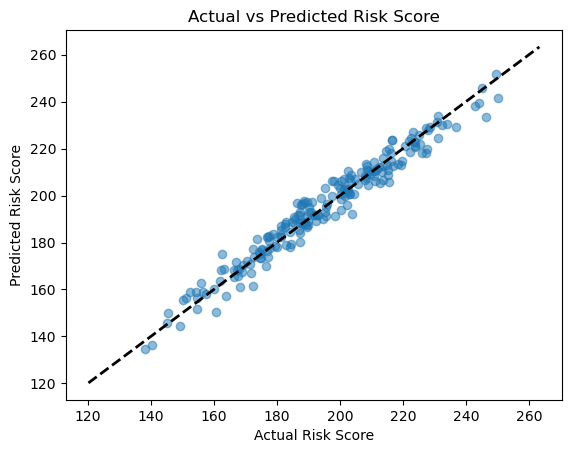

In [25]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Actual vs Predicted Risk Score")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect prediction
plt.show()